# Exercise 10: Multivariate models

## Table of Contents

* Multivariate models w/o interactions
    * One-way ANOVA
    * Post-hoc testing 
    * Mixed linear models
* Multivariate models w/ interactions
    * Two-way ANOVA
    * Mixed linear models w/ interaction terms
    
## Setup

In [54]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sps
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

# For retina displays only 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline

## Multivariate models w/o interactions

In [73]:
# Creating some fake data
n = 20

X1 = np.random.normal(loc=.5, scale=2, size=n)
X2 = np.random.normal(loc=2, scale=2, size=n)
X3 = np.random.normal(loc=0, scale=2, size=n)

In [74]:
# Reorganizing data in dataframe for statsmodels
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})
df_m = df.melt(value_vars=['X1', 'X2', 'X3'], var_name='Group', value_name='X')
df_m

,Group,X
0,X1,6.406626
1,X1,-0.723982
2,X1,1.452325
3,X1,1.593178
4,X1,-0.147829
5,X1,5.069492
6,X1,0.847301
7,X1,-2.497610
8,X1,-2.168505
9,X1,-1.458292


### One-way ANOVA

In [75]:
# Using scipy.stats 
sps.f_oneway(X1, X2, X3)

F_onewayResult(statistic=6.189530417060668, pvalue=0.003693375917647706)

In [76]:
# Using statsmodels, "C()" indicates it is a categorical variable

model = smf.ols('X ~ C(Group)', data=df_m).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Group),2.0,58.833059,29.416530,6.18953,0.003693
Residual,57.0,270.899741,4.752627,NaN,NaN


### Post-hoc testing 

In [94]:
# Using t-tests with bonferroni correction 

results = model.t_test_pairwise('C(Group)', method='bonferroni')
results.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-bonferroni,reject-bonferroni
X2-X1,2.297026,0.689393,3.331955,0.001518,0.916541,3.677512,0.004555,True
X3-X1,0.473804,0.689393,0.687277,0.494695,-0.906681,1.854290,1.000000,False
X3-X2,-1.823222,0.689393,-2.644677,0.010546,-3.203708,-0.442736,0.031637,True


In [92]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [93]:
pairwise_tukeyhsd(df_m['X'], df_m['Group'], alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
X1,X2,2.297,0.0043,0.6381,3.956,True
X1,X3,0.4738,0.7524,-1.1851,2.1328,False
X2,X3,-1.8232,0.028,-3.4822,-0.1643,True


### Mixed linear models

In [143]:
# Loading some R data 

data = sm.datasets.get_rdataset("dietox", "geepack").data
data

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5
...,...,...,...,...,...,...,...,...
856,8442,Evit000,Cu175,24,25.7,73.19995,83.800003,8
857,8442,Evit000,Cu175,24,25.7,81.69995,99.800003,9
858,8442,Evit000,Cu175,24,25.7,90.29999,115.200001,10
859,8442,Evit000,Cu175,24,25.7,96.00000,133.200001,11


In [144]:
# Sorting each pig into its own column

data_reorg = data.pivot(index='Time', columns='Pig', values='Weight')
data_reorg

Pig,4601,4602,4603,4605,4641,4643,4645,4756,4757,4759,4760,4813,4814,4815,4817,4854,4856,4857,4858,5389,5392,5497,5500,5501,5502,5524,5527,5528,5578,5581,5582,5850,5851,5852,5862,5865,5866,6055,6056,6057,6058,6207,6208,6211,6284,6287,6288,6430,6432,6433,6909,6910,6912,8049,8050,8051,8053,8139,8141,8142,8144,8191,8192,8193,8195,8269,8270,8271,8273,8437,8439,8442
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,26.50000,28.29999,27.59999,31.50000,27.09999,27.00000,27.70000,17.00000,26.89999,22.59999,15.00000,27.29999,26.20000,24.89999,24.59999,29.00000,32.00000,26.00000,28.00000,24.29999,24.59999,21.20000,17.00000,30.00000,29.59999,22.39999,26.59999,24.00000,27.09999,27.00000,29.50000,22.79999,22.29999,23.79999,22.00000,22.00000,22.00000,26.20000,32.50000,27.00000,27.39999,27.09999,26.79999,24.50000,23.09999,21.50000,24.09999,34.19998,25.09999,32.19998,24.70000,24.20000,24.50000,22.00000,26.79999,30.59999,21.89999,24.00000,24.20000,25.20000,23.50000,26.59999,35.39999,29.29999,25.29999,22.09999,23.70000,24.00000,25.00000,27.00000,27.29999,25.70000
2,27.59999,30.09999,30.59999,34.79999,33.00000,31.79999,33.59998,19.00000,32.29999,28.50000,19.39999,32.39999,31.09999,29.70000,28.00000,32.69998,35.19998,34.50000,31.20000,28.39999,25.79999,25.79999,19.00000,34.69998,34.19998,25.20000,28.20000,28.20000,34.69998,30.00000,31.39999,27.00000,24.70000,30.00000,25.79999,27.00000,24.79999,30.39999,38.79999,32.39999,32.19998,30.29999,31.09999,31.59999,26.00000,24.59999,28.09999,42.09998,23.20000,36.39999,28.89999,29.20000,28.39999,26.59999,33.59998,37.59998,26.79999,26.79999,25.39999,29.79999,25.89999,33.00000,42.29999,34.00000,31.59999,26.29999,28.79999,28.89999,30.09999,30.00000,31.20000,28.70000
3,36.50000,38.29999,38.69998,40.69998,42.50000,39.00000,44.00000,23.59999,38.59998,32.69998,21.39999,38.29999,34.59998,33.79999,34.59998,38.29999,41.50000,40.39999,38.79999,36.00000,28.59999,29.39999,23.00000,42.79999,43.00000,30.00000,38.39999,35.29999,40.69998,37.79999,39.39999,33.89999,30.39999,37.09998,29.20000,32.89999,30.00000,37.39999,47.79999,38.19998,37.89999,38.19998,37.79999,37.39999,30.09999,28.50000,32.50000,50.09998,28.89999,41.79999,34.59998,36.19998,35.00000,33.09998,42.09998,42.79999,34.69998,33.00000,30.70000,35.69998,32.19998,38.19998,49.50000,39.00000,34.00000,33.29999,35.09998,35.79999,37.09998,35.39999,37.00000,33.39999
4,40.29999,44.50000,47.19998,47.69998,50.09998,44.79999,46.69998,30.00000,46.00000,39.89999,25.29999,45.79999,41.19998,38.79999,41.50000,45.50000,47.69998,45.00000,44.69998,40.29999,30.39999,36.79999,29.39999,48.39999,50.00000,36.50000,45.79999,42.69998,47.59998,43.29999,44.79999,37.69998,36.89999,43.19998,35.79999,38.00000,35.79999,43.00000,54.50000,44.69998,45.89999,43.19998,44.59998,46.39999,40.69998,39.09998,40.59998,57.59998,36.79999,48.19998,42.19998,43.09998,41.89999,38.39999,47.89999,47.39999,41.29999,39.09998,35.59998,42.00000,32.39999,46.39999,58.69998,45.39999,35.19998,38.00000,43.00000,44.00000,46.00000,41.00000,43.89999,40.00000
5,49.09998,51.59998,54.09998,55.89999,56.50000,50.89999,54.79999,36.29999,57.79999,47.59998,31.89999,53.79999,49.19998,48.29999,49.69998,48.59998,53.79999,53.50000,53.59998,46.19998,36.09998,43.19998,34.59998,53.29999,57.00000,43.29999,54.89999,48.19998,56.50000,51.50000,50.29999,41.39999,44.09998,50.39999,41.09998,46.19998,42.29999,49.50000,63.00000,53.19998,51.19998,52.50000,50.50000,53.59998,46.59998,45.29999,46.00000,62.29999,44.19998,55.89999,48.19998,49.19998,49.00000,46.59998,56.19998,56.59998,48.69998,46.39999,42.79999,50.00000,29.79999,53.19998,66.59998,51.79999,37.29999,39.59998,49.09998,47.50000,53.59998,48.59998,49.79999,46.69998
6,55.39999,57.59998,61.50000,62.19998,63.00000,57.39999,61.00000,42.39999,58.59998,53.79999,37.59998,60.00000,55.59998,52.89999,56.50000,56.00000,61.59998,60.19998,59.19998,51.89999,36.09998,51.09998,40.59998,60.00000,63.50000,50.00000,60.09998,53.19998,64.00000,57.00000,57.00000,48.19998,52.79999,60.19998,5

<AxesSubplot:xlabel='Time'>

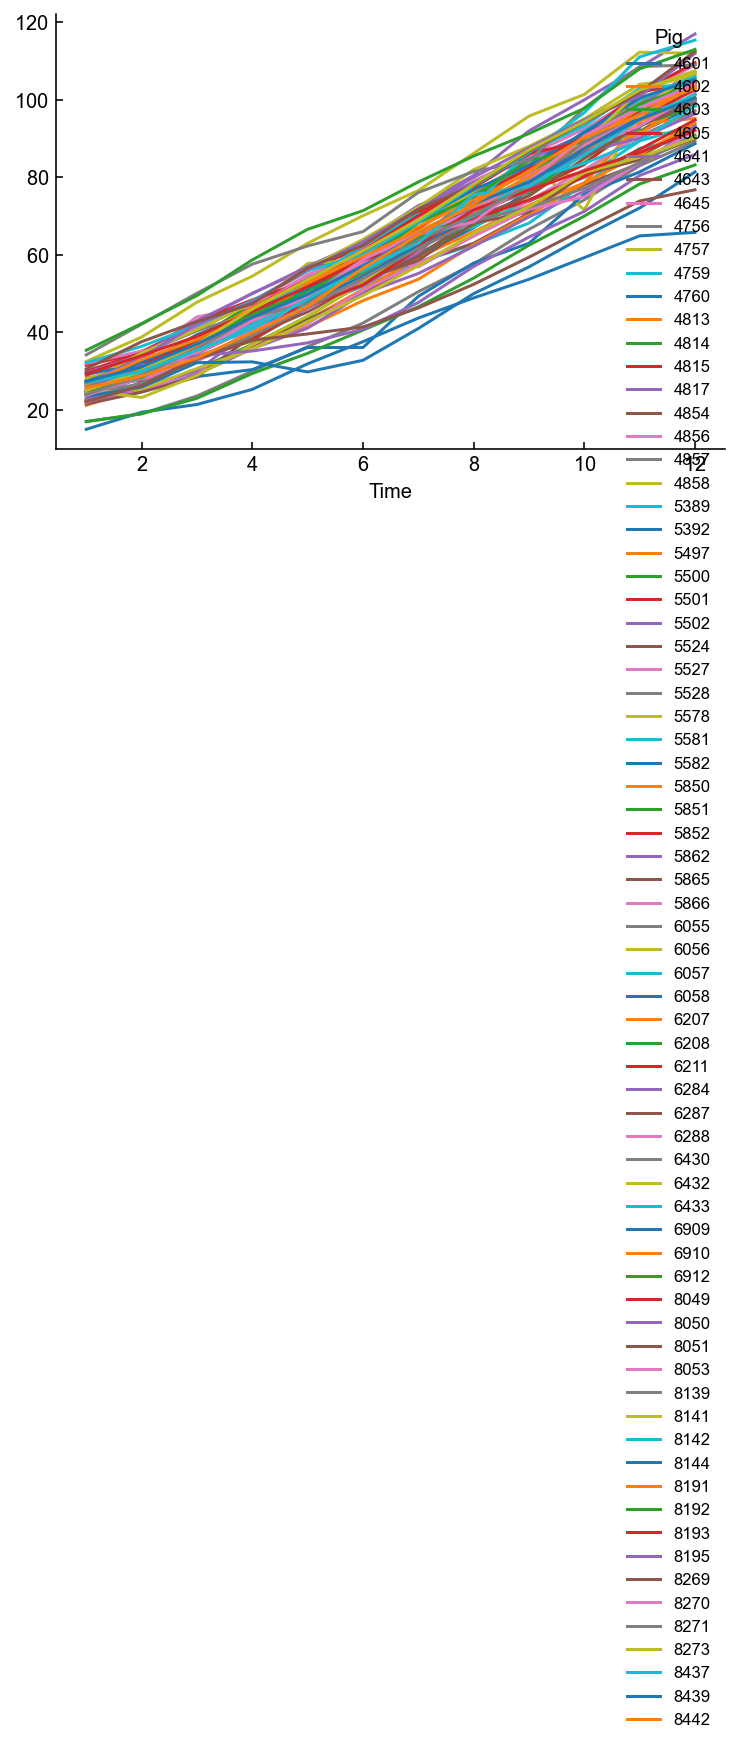

In [148]:
# Exercise: Plotting the data. Is this a candidate for a mixed linear model?

data_reorg.plot()

In [150]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
md.fit().summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            
========================================================

"""

## Multivariate models w/ interactions

## Two-way ANOVA

In [129]:
# Creating some fake data with no interaction
n = 15

age_w_s = np.random.normal(loc=0, scale=2, size=n)
age_w_l = np.random.normal(loc=2, scale=2, size=n)
age_m_s = np.random.normal(loc=.5, scale=2, size=n)
age_m_l = np.random.normal(loc=2.5, scale=2, size=n)
age = np.concatenate([age_w_s, age_w_l, age_m_s, age_m_l])

typ = np.repeat(["wild-type", "wild-type", "mutant", "mutant"], repeats=[len(age_w_s), len(age_w_l), len(age_m_s), len(age_m_l)])
size = np.repeat(["small", "large", "small", "large"], repeats=[len(age_w_s), len(age_w_l), len(age_m_s), len(age_m_l)])
df_2 = pd.DataFrame({'type': typ, 'size': size, 'age': age})
df_2

,type,size,age
0,wild-type,small,-0.209195
1,wild-type,small,-0.780501
2,wild-type,small,0.447441
3,wild-type,small,2.207825
4,wild-type,small,-0.624387
5,wild-type,small,-1.038629
6,wild-type,small,-0.578531
7,wild-type,small,0.160510
8,wild-type,small,0.724502
9,wild-type,small,0.299897


<AxesSubplot:title={'center':'age'}, xlabel='[type, size]'>

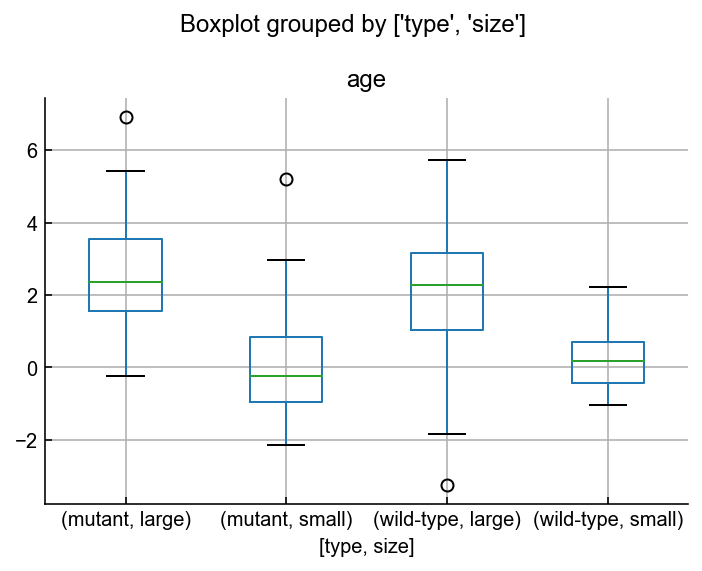

In [130]:
# Plotting the data
df_2.boxplot(by=['type', 'size'], figsize=(5,4))

In [131]:
two_way_result = smf.ols('age ~ C(type) + C(size)', data=df_2).fit()
sm.stats.anova_lm(two_way_result)

,df,sum_sq,mean_sq,F,PR(>F)
C(type),1.0,1.099638,1.099638,0.306965,0.581716
C(size),1.0,66.822004,66.822004,18.653416,0.000063
Residual,57.0,204.190711,3.582293,NaN,NaN


In [132]:
two_way_result = smf.ols('age ~ C(type) + C(size) + C(type):C(size)', data=df_2).fit()
sm.stats.anova_lm(two_way_result)

,df,sum_sq,mean_sq,F,PR(>F)
C(type),1.0,1.099638,1.099638,0.305087,0.582909
C(size),1.0,66.822004,66.822004,18.539284,0.000068
C(type):C(size),1.0,2.347306,2.347306,0.651243,0.423083
Residual,56.0,201.843406,3.604347,NaN,NaN


In [ ]:
# Excersize: Generate data with an interaction effect 







## Mixed linear models w/ interaction terms

In [153]:
# Fitting 
model = sm.MixedLM.from_formula("Weight ~ Time", data, re_formula="Time", groups=data["Pig"])
result = model.fit()
result.summary()

/Users/badr/opt/anaconda3/envs/py3-qn/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/badr/opt/anaconda3/envs/py3-qn/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2131: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/badr/opt/anaconda3/envs/py3-qn/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/badr/opt/anaconda3/envs/py3-qn/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2131: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/badr/opt/anaconda3/envs/py3-qn/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: 

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               5.7891    
Min. group size:   11       Log-Likelihood:      -2220.3890
Max. group size:   12       Converged:           No        
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.672 23.438 0.000 14.423 17.055
Time              6.939    0.085 81.326 0.000  6.772  7.106
Group Var        30.266    4.271                           
Group x Time Cov  0.746    0.304                           
Time Var          0.483    0.046                           
===========================================================

"""